<a href="https://colab.research.google.com/github/tianygoulart/Machine-Leaning/blob/main/DLE_Pr%C3%A1tica_1_novo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy #importa biblioteca para manipulação de matrizes
from matplotlib import pyplot as plt #importa bilbioteca para criação de gráficos

#início das importações de classes do Keras (modelos de Deep Learning)
from keras.datasets import mnist           #importa dataset mnist
from keras.models import Sequential        #importa um modelo sequencial
from keras.layers import Dense, InputLayer #importa camadas totalmente conectadas
from keras.layers import Dropout           #importa a estrutura de dropout
from keras.utils import np_utils           #importa biblioteca de utilidades do Keras

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)


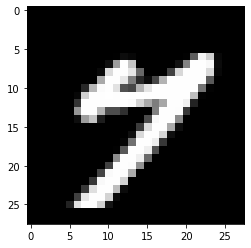

7


In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() #importa o dataset Mnist da biblioteca do Keras
print(X_train.shape) #imprime o tamanho do vetor

first_image = X_train[1001] #obtém a imagem de treino no índice 100 do vetor
# realiza manipulação dos dados da imagem
first_image = numpy.array(first_image, dtype='float')
pixels = first_image.reshape((28, 28))
#exibe a imagem do vetor
plt.imshow(pixels, cmap='gray')
plt.show()

print(y_train[1001]) #imprime a classe da imagem de treino do índice 100

In [ ]:
num_pixels = X_train.shape[1] * X_train.shape[2]  #calcula o total de pixels da imagem
print(num_pixels)

#tranforma os valores dos pixels para float32
X_train2 = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test2 = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

#normalizando os valores dos pixels entre 0 e 1
X_train2 = X_train2 / 255
X_test2 = X_test2 / 255

784


In [ ]:
# transforma os y em one-hot vector
y_train_h = np_utils.to_categorical(y_train)
y_test_h = np_utils.to_categorical(y_test)

#otém o número de classes do problema
num_classes = y_test_h.shape[1]

print(num_pixels)
print(y_train[1001])
print(y_train_h[1001])

784
7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [ ]:
# Cria um modelo do tipo sequencial
model = Sequential()

#model.add(InputLayer(input_shape = num_pixels))
model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu')) # cria a primeira camada da rede
model.add(Dense(1024, kernel_initializer='normal', activation='relu')) # cria a primeira camada da rede
model.add(Dense(2048, kernel_initializer='normal', activation='relu')) # cria a segunda camada da rede
model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax')) # cria a camada de saída

model.summary() #imprime informações sobre o modelo

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 784)               615440    
                                                                 
 dense_5 (Dense)             (None, 1024)              803840    
                                                                 
 dense_6 (Dense)             (None, 2048)              2099200   
                                                                 
 dense_7 (Dense)             (None, 10)                20490     
                                                                 
Total params: 3,538,970
Trainable params: 3,538,970
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) #compila o modelo criado
result = model.fit(X_train2, y_train_h, validation_data=(X_test2, y_test_h), epochs=20, verbose=1, batch_size = 100) #executa o treinamento

Epoch 1/20
600/600 [==============================] - 16s 4ms/step - loss: 0.3363 - accuracy: 0.8962 - val_loss: 0.1141 - val_accuracy: 0.9648
Epoch 2/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0740 - accuracy: 0.9778 - val_loss: 0.0942 - val_accuracy: 0.9712
Epoch 3/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0446 - accuracy: 0.9858 - val_loss: 0.0839 - val_accuracy: 0.9744
Epoch 4/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0303 - accuracy: 0.9903 - val_loss: 0.0835 - val_accuracy: 0.9776
Epoch 5/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0262 - accuracy: 0.9911 - val_loss: 0.0799 - val_accuracy: 0.9786
Epoch 6/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0249 - accuracy: 0.9920 - val_loss: 0.0969 - val_accuracy: 0.9754
Epoch 7/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0207 - accuracy: 0.9932 - val_loss: 0.0879 - val_accuracy: 0.9782
Epoch

In [ ]:
#obtém a imagem número 1001
x = X_train2[1001]
print(x.shape)
x = numpy.expand_dims(x, axis=0)
print(x.shape)

# imprime a avaliação da amostra
print(model.predict(x))
print(numpy.argmax(model.predict(x)))

(784,)
(1, 784)
[[4.2241606e-19 1.1044159e-13 3.0527857e-15 5.2271426e-17 2.1052537e-08
  1.1259710e-13 3.9528556e-17 1.0000000e+00 2.5224095e-19 7.0693851e-09]]
7
